(array([ 27., 118.,  85.,  47.,  34.,  28.,  15.,  18.,  16.,  12.]),
 array([-1.44666616, -1.01863683, -0.59060751, -0.16257818,  0.26545114,
         0.69348047,  1.12150979,  1.54953912,  1.97756844,  2.40559777,
         2.83362709]),
 <a list of 10 Patch objects>)

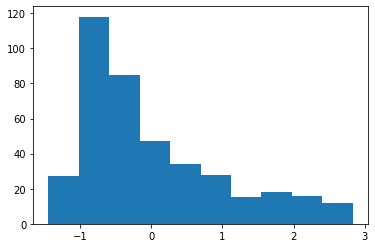

In [44]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/microarray.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

meanVals = np.zeros(400).reshape((20,20))

for i in range(20):
  for j in range(20):
    total = 0
    for k in range(20):
      for l in range (20):
        if (k - 10)*(k - 10) + (l - 10)*(l - 10) <= 100:
          total += gray[i*20+k][j*20+l]
    meanVals[i][j] = total / 400

avg = meanVals.sum() / 400
std_dev = meanVals.std()

zVals = np.zeros(400)
for i in range(20):
  for j in range(20):
    zVals[20* i+j] = (meanVals[i][j] - avg)/std_dev

plt.hist(zVals)

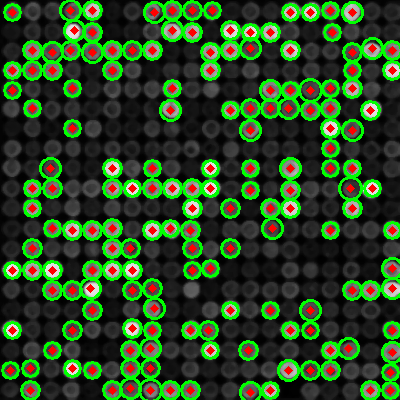

In [40]:
img = cv2.imread('/microarray.png', 0)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 7,
                           param1=300, param2=10, minRadius=8, maxRadius=12)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

cv2_imshow(cimg)

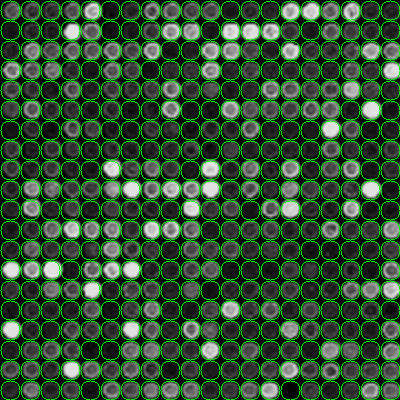

In [43]:
gray_circle = cv2.cvtColor(gray,cv2.COLOR_GRAY2BGR)
for i in range(20):
  for j in range(20):
    cv2.circle(gray_circle,(i*20 + 10,j*20 + 10),10,(0,255,0),1)

cv2_imshow(gray_circle )